In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim = rebound.Simulation()
sim.units = ('AU', 'yr', 'Msun')
sim.add("Sun")
sim.add("Jupiter")
sim.move_to_com()
#sim.integrator = "whfast"
sim.dt = .01

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Jupiter'... 
Found: Jupiter Barycenter (5) (chosen from query 'Jupiter')


In [6]:
as_per_ring = 1000
rings = 1

for j in range (rings):
    for i in range (as_per_ring):
        mass=1e-29
        radius=2.502+0.001*j
        omega=(2*np.pi)/as_per_ring*i
        ecc = 0.2
        sim.add(m=mass,a=radius,omega=omega)
        

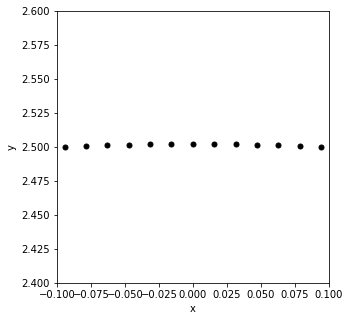

In [7]:
fig = rebound.OrbitPlot(sim,ylim=[2.4,2.6],xlim=[-0.1,0.1],orbit_type=None)

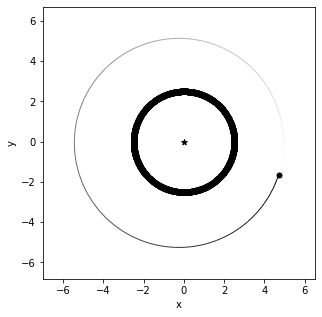

In [8]:
fig = rebound.OrbitPlot(sim)

In [ ]:
sim.status()

In [9]:
years = 500
time = years
sim.exit_max_distance = 50.
#sim.ri_whfast.safemode = 0
#sim.ri_whfast.corrector = 11
for i in range (years):

    clear_output(wait=True)
    print(i)

    # try intergrating
    try:
        sim.integrate(i*2.*np.pi)  
    # delete particle if it escaped the system
    except rebound.Escape as error:
        print(error)
        for j in range(sim.N):
            p = sim.particles[j]
            d2 = p.x*p.x + p.y*p.y + p.z*p.z
            if d2>sim.exit_max_distance**2:
                index=j # cache index rather than remove here since our loop would go beyond end of particles array
        sim.remove(index=index)

    

93


In [12]:
sim.save("snapshot.bin")

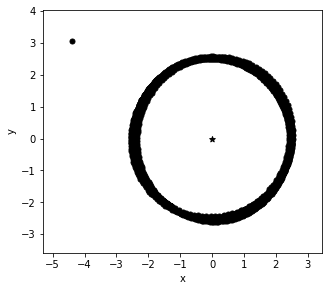

In [56]:
fig, ax = rebound.OrbitPlot(sim, orbit_type=None)

In [36]:
bin_list = []

for i in range (1000):

    bin_list.append(sim.particles[i+2].a)
    

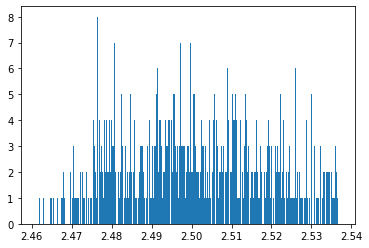

In [38]:
plt.hist(bin_list,bins=500)
plt.show()

In [ ]:
print(bin_list)